In [1]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as py 
py.init_notebook_mode(connected=True)                  
import plotly.graph_objs as go                         
import plotly.tools as tls                             
from collections import Counter                        
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV                                         # to split the data
from sklearn.metrics import mean_squared_error, roc_auc_score, roc_curve, r2_score, accuracy_score, confusion_matrix, classification_report, fbeta_score     # to evaluate our model
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from catboost import CatBoostClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense



import warnings
import missingno as msno
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")

pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# Reading the dataset
#df = pd.read_csv("../input/emergency-service-triage-application/data.csv",sep=';')
df = pd.read_csv("../input/triage/data.csv",sep=';')
#/kaggle/input/triage/data.csv

**Data collection**
The first step is Data Collection. As we are using secondary data we do not need to collect the data.
Here are the variables and values of the dataset.

*Group:
Sex: Sex of the patient
Age: Age of the patient
Patients number per hour:
Arrival mode: Type of transportation to the hospital
Injury: Whether the patient is injured or not
Chief_complain: The patient's complaint
Mental: The mental state of the patient
Pain: Whether the patient has pain
NRS_pain: Nurse's assessment of pain for the patient
SBP: Systolic Blood Pressure.
DBP: Diastolic Blood Pressure.
HR: Heat Rate.
RR: Respiratory rate
BT: Body Temperature
Saturation:
KTAS_RN:
Diagnosis in ED:
Disposition: Action to be taken
KTAS_expert:
Error_group:
Length of stay_min:
KTAS duration_min:
mistriage:*



**Step two is Data Analysis (EDA)**

In [3]:
# The first 5 observation units of the data set were accessed.
df.head()

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,SBP,DBP,HR,RR,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage
0,2,2,71,3,3,2,right ocular pain,1,1,2,160,100,84,18,36.6,100,2,Corneal abrasion,1,4,2,86,"5,00",1
1,1,1,56,12,3,2,right forearm burn,1,1,2,137,75,60,20,36.5,NaN,4,"Burn of hand, firts degree dorsum",1,5,4,64,"3,95",1
2,2,1,68,8,2,2,"arm pain, Lt",1,1,2,130,80,102,20,36.6,98,4,"Fracture of surgical neck of humerus, closed",2,5,4,862,"1,00",1
3,1,2,71,8,1,1,ascites tapping,1,1,3,139,94,88,20,36.5,NaN,4,Alcoholic liver cirrhosis with ascites,1,5,6,108,"9,83",1
4,1,2,58,4,3,1,"distension, abd",1,1,3,91,67,93,18,36.5,NaN,4,Ascites,1,5,8,109,"6,60",1


In [4]:
#Now lets get some information from the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Group                     1267 non-null   int64 
 1   Sex                       1267 non-null   int64 
 2   Age                       1267 non-null   int64 
 3   Patients number per hour  1267 non-null   int64 
 4   Arrival mode              1267 non-null   int64 
 5   Injury                    1267 non-null   int64 
 6   Chief_complain            1267 non-null   object
 7   Mental                    1267 non-null   int64 
 8   Pain                      1267 non-null   int64 
 9   NRS_pain                  1267 non-null   object
 10  SBP                       1267 non-null   object
 11  DBP                       1267 non-null   object
 12  HR                        1267 non-null   object
 13  RR                        1267 non-null   object
 14  BT                      

In [5]:
# The size of the data set
df.shape

(1267, 24)

In [6]:
# Mean, count and other descriptive features of the selected data.
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99])

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Mental,Pain,KTAS_RN,Disposition,KTAS_expert,Error_group,Length of stay_min,mistriage
count,1267.000,1267.000,1267.000,1267.000,1267.000,1267.000,1267.000,1267.000,1267.000,1267.000,1267.000,1267.000,1267.000,1267.000
mean,1.457,1.522,54.424,7.519,2.821,1.193,1.106,0.564,3.335,1.609,3.266,0.558,11016.103,0.250
std,0.498,0.500,19.725,3.161,0.808,0.394,0.448,0.496,0.885,1.158,0.886,1.571,80446.092,0.628
min,1.000,1.000,16.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000
10%,1.000,1.000,25.000,3.000,2.000,1.000,1.000,0.000,2.000,1.000,2.000,0.000,59.600,0.000
25%,1.000,1.000,37.000,5.000,2.000,1.000,1.000,0.000,3.000,1.000,3.000,0.000,133.000,0.000
50%,1.000,2.000,57.000,7.000,3.000,1.000,1.000,1.000,3.000,1.000,3.000,0.000,274.000,0.000
75%,2.000,2.000,71.000,10.000,3.000,1.000,1.000,1.000,4.000,2.000,4.000,0.000,606.500,0.000
90%,2.000,2.000,79.000,12.000,4.000,2.000,1.000,1.000,4.000,2.000,4.000,2.000,9074.200,2.000
95%,2.000,2.000,82.000,13.000,4.000,2.000,2.000,1.000,5.000,4.000,5.000,4.000,10094.400,2.000


In [7]:
# Are there any null values?
df.isnull().values.any()

True

**Data preprocessing**
Data preprocessing usually comprises of data cleaning, data transformation and data 

In [8]:
def missing_values_table(dataframe):
    variables_with_na = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[variables_with_na].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[variables_with_na].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df)
    return variables_with_na

df['NRS_pain'] = df[["NRS_pain"]].replace("#BO�!",np.NaN)

missing_values_table(df)

                 n_miss  ratio
Saturation          688 54.300
NRS_pain            556 43.880
Diagnosis in ED       2  0.160


['NRS_pain', 'Saturation', 'Diagnosis in ED']

<AxesSubplot:>

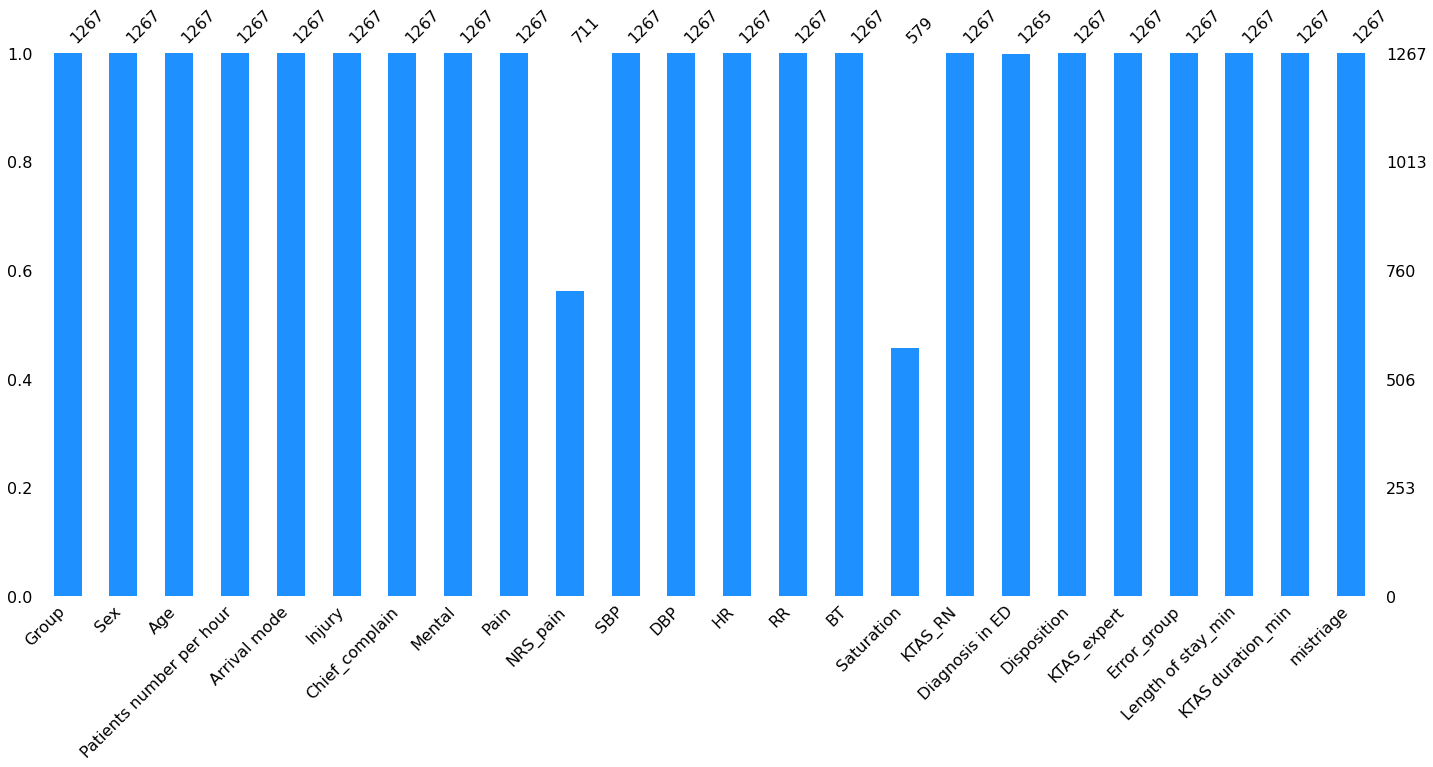

In [9]:
msno.bar(df, color="dodgerblue")

In [10]:
# Fill Missing Value

df["NRS_pain"] = df.groupby(["mistriage", "KTAS_expert"])["NRS_pain"].transform(lambda x: x.fillna(x.mode()[0]))
df["Saturation"] = df.groupby(["mistriage", "KTAS_expert"])["Saturation"].transform(lambda x: x.fillna(x.mode()[0]))
df["Diagnosis in ED"] = df.groupby(["mistriage", "KTAS_expert"])["Diagnosis in ED"].transform(lambda x: x.fillna(x.mode()[0]))

In [11]:
df.isnull().values.any()

False

<AxesSubplot:>

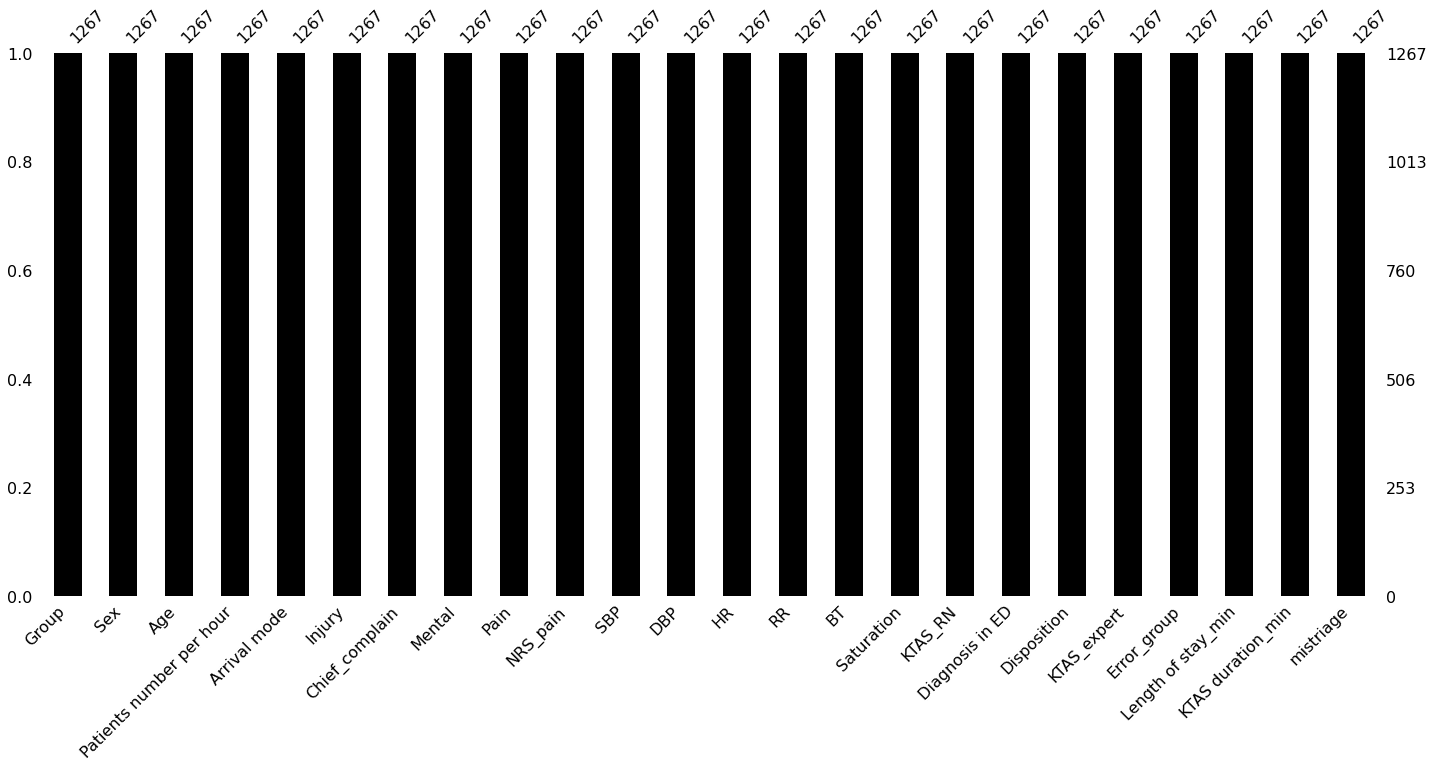

In [12]:
msno.bar(df, color="black")

## 3.2. Feature Engineering

In [13]:
injury_cat = ['No','Yes']
sex_cat = ['Female','Male']
pain_cat = ['No','Yes']
mental_cat = ['Alert','Verbose Response','Pain Response','Unresponsive']
group_cat = ['Local ED (3th Degree)', 'Regional ED (4th Degree)']
arrival_mode_cat = ['Walking','Public Ambulance', 'Private Vehicle','Private Ambulance', 'Other','Other','Other']
disposition_cat = ['Discharge', 'Admission to Ward', 'Admission to ICU', 'Discharge', 'Transfer', 'Death', 'Surgery']
KTAS_cat = ['Emergency','Emergency','Emergency', 'Non-Emergency', 'Non-Emergency']
mistriage_cat = ['Normal Triage','Over Triage','Under Triage']

df['KTAS duration_min'] = df['KTAS duration_min'].apply(lambda x: int(float(x.replace(',', '.'))))
df['NRS_pain'] = df['NRS_pain'].apply(lambda x:int(x))

###############################################################################################################################
#Categorical data were entered as numerical data. Therefore, it was categorized again categorically to make it more meaningful. 
###############################################################################################################################
df.loc[df["Sex"] == 1, "Sex"] = sex_cat[0]
df.loc[df["Sex"] == 2, "Sex"] = sex_cat[1]

df.loc[df["Injury"] == 1, "Injury"] = injury_cat[0]
df.loc[df["Injury"] == 2, "Injury"] = injury_cat[1]

df.loc[df["Pain"] == 0, "Pain"] = pain_cat[0]
df.loc[df["Pain"] == 1, "Pain"] = pain_cat[1]

df.loc[df["Mental"] == 1, "Mental"] = mental_cat[0]
df.loc[df["Mental"] == 2, "Mental"] = mental_cat[1]
df.loc[df["Mental"] == 3, "Mental"] = mental_cat[2]
df.loc[df["Mental"] == 4, "Mental"] = mental_cat[3]

df.loc[df["Group"] == 1, "Group"] = group_cat[0]
df.loc[df["Group"] == 2, "Group"] = group_cat[1]

df.loc[df["Arrival mode"] == 1, "Arrival mode"] = arrival_mode_cat[0]
df.loc[df["Arrival mode"] == 2, "Arrival mode"] = arrival_mode_cat[1]
df.loc[df["Arrival mode"] == 3, "Arrival mode"] = arrival_mode_cat[2]
df.loc[df["Arrival mode"] == 4, "Arrival mode"] = arrival_mode_cat[3]
df.loc[df["Arrival mode"] == 5, "Arrival mode"] = arrival_mode_cat[4]
df.loc[df["Arrival mode"] == 6, "Arrival mode"] = arrival_mode_cat[5]
df.loc[df["Arrival mode"] == 7, "Arrival mode"] = arrival_mode_cat[6]

df.loc[df["Disposition"] == 1, "Disposition"] = disposition_cat[0]
df.loc[df["Disposition"] == 2, "Disposition"] = disposition_cat[1]
df.loc[df["Disposition"] == 3, "Disposition"] = disposition_cat[2]
df.loc[df["Disposition"] == 4, "Disposition"] = disposition_cat[3]
df.loc[df["Disposition"] == 5, "Disposition"] = disposition_cat[4]
df.loc[df["Disposition"] == 6, "Disposition"] = disposition_cat[5]
df.loc[df["Disposition"] == 7, "Disposition"] = disposition_cat[6]

df.loc[df["KTAS_RN"] == 1, "KTAS_RN"] = KTAS_cat[0]
df.loc[df["KTAS_RN"] == 2, "KTAS_RN"] = KTAS_cat[1]
df.loc[df["KTAS_RN"] == 3, "KTAS_RN"] = KTAS_cat[2]
df.loc[df["KTAS_RN"] == 4, "KTAS_RN"] = KTAS_cat[3]
df.loc[df["KTAS_RN"] == 5, "KTAS_RN"] = KTAS_cat[4]

df.loc[df["KTAS_expert"] == 1, "KTAS_expert"] = KTAS_cat[0]
df.loc[df["KTAS_expert"] == 2, "KTAS_expert"] = KTAS_cat[1]
df.loc[df["KTAS_expert"] == 3, "KTAS_expert"] = KTAS_cat[2]
df.loc[df["KTAS_expert"] == 4, "KTAS_expert"] = KTAS_cat[3]
df.loc[df["KTAS_expert"] == 5, "KTAS_expert"] = KTAS_cat[4]

df.loc[df["mistriage"] == 0, "mistriage"] = mistriage_cat[0]
df.loc[df["mistriage"] == 1, "mistriage"] = mistriage_cat[1]
df.loc[df["mistriage"] == 2, "mistriage"] = mistriage_cat[2]
###############################################################################################################################
##############               Nonsense data was encountered in variables containing numerical data.                 ############
##############                 These values have been replaced by the mode of the variable.                        ############
###############################################################################################################################

df[["SBP","DBP","HR","RR","BT","Saturation"]] = df[["SBP","DBP","HR","RR","BT","Saturation"]].replace("??",0).astype(str).astype(float)
df['SBP'] = df['SBP'].replace(0,df['SBP'].mode()[0])
df['DBP'] = df['DBP'].replace(0,df['DBP'].mode()[0])

###############################################################################################################################
##############                                        Feature Engineering                                          ############
###############################################################################################################################
interval = (0, 25, 45, 60, 100)
cats = ['Young', 'Adult', 'Mid_Age', 'Old']
df["New_Age"] = pd.cut(df.Age, interval, labels=cats)

df.loc[df['SBP'] < 80, 'New_SBP'] = 'Low'
df.loc[(df["SBP"] >= 80) & (df["SBP"] <= 120), 'New_SBP'] = 'Normal'
df.loc[df['SBP'] > 120, 'New_SBP'] = 'High'

df.loc[df['DBP'] < 60, 'New_DBP'] = 'Low'
df.loc[(df["DBP"] >= 60) & (df["DBP"] <= 80), 'New_DBP'] = 'Normal'
df.loc[df['DBP'] > 80, 'New_DBP'] = 'High'

df.loc[df['HR'] < 45, 'New_HR'] = 'Low'
df.loc[(df["HR"] >= 45) & (df["HR"] <= 100), 'New_HR'] = 'Normal'
df.loc[df['HR'] > 100, 'New_HR'] = 'High'

df.loc[df['RR'] < 12, 'New_RR'] = 'Low'
df.loc[(df["RR"] >= 12) & (df["RR"] <= 25), 'New_RR'] = 'Normal'
df.loc[df['RR'] > 25, 'New_RR'] = 'High'

df.loc[df['BT'] < 36.4, 'New_BT'] = 'Low'
df.loc[(df["BT"] >= 36.4) & (df["BT"] <= 37.6), 'New_BT'] = 'Normal'
df.loc[df['BT'] > 37.6, 'New_BT'] = 'High'

df.loc[df['NRS_pain'] < 3, 'New_NRS_pain'] = 'Low Pain'
df.loc[(df["NRS_pain"] >= 3) & (df["NRS_pain"] <= 7), 'New_NRS_pain'] = 'Pain'
df.loc[df['NRS_pain'] > 7, 'New_NRS_pain'] = 'High Pain'

df.loc[df['KTAS duration_min'] < 10, 'New_KTAS_duration_min'] = 'Immediate'
df.loc[(df["KTAS duration_min"] >= 10) & (df["KTAS duration_min"] <= 60), 'New_KTAS_duration_min'] = 'Very Urgent'
df.loc[(df["KTAS duration_min"] >= 61) & (df["KTAS duration_min"] <= 120), 'New_KTAS_duration_min'] = 'Urgent'
df.loc[(df["KTAS duration_min"] >= 121) & (df["KTAS duration_min"] <= 240), 'New_KTAS_duration_min'] = 'Standart'
df.loc[df['KTAS duration_min'] > 240, 'New_KTAS_duration_min'] = 'Non-Urgent'

df.loc[df['Length of stay_min'] < 10, 'New_Length_of_stay_min'] = 'Immediate'
df.loc[(df["Length of stay_min"] >= 10) & (df["Length of stay_min"] <= 60), 'New_Length_of_stay_min'] = 'Very Urgent'
df.loc[(df["Length of stay_min"] >= 61) & (df["Length of stay_min"] <= 120), 'New_Length_of_stay_min'] = 'Urgent'
df.loc[(df["Length of stay_min"] >= 121) & (df["Length of stay_min"] <= 240), 'New_Length_of_stay_min'] = 'Standart'
df.loc[df['Length of stay_min'] > 240, 'New_Length_of_stay_min'] = 'Non-Urgent'

df.head()

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,SBP,DBP,HR,RR,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage,New_Age,New_SBP,New_DBP,New_HR,New_RR,New_BT,New_NRS_pain,New_KTAS_duration_min,New_Length_of_stay_min
0,Regional ED (4th Degree),Male,71,3,Private Vehicle,Yes,right ocular pain,Alert,Yes,2,160.000,100.000,84.000,18.000,36.600,100.000,Emergency,Corneal abrasion,Discharge,Non-Emergency,2,86,5,Over Triage,Old,High,High,Normal,Normal,Normal,Low Pain,Immediate,Urgent
1,Local ED (3th Degree),Female,56,12,Private Vehicle,Yes,right forearm burn,Alert,Yes,2,137.000,75.000,60.000,20.000,36.500,98.000,Non-Emergency,"Burn of hand, firts degree dorsum",Discharge,Non-Emergency,4,64,3,Over Triage,Mid_Age,High,Normal,Normal,Normal,Normal,Low Pain,Immediate,Urgent
2,Regional ED (4th Degree),Female,68,8,Public Ambulance,Yes,"arm pain, Lt",Alert,Yes,2,130.000,80.000,102.000,20.000,36.600,98.000,Non-Emergency,"Fracture of surgical neck of humerus, closed",Admission to Ward,Non-Emergency,4,862,1,Over Triage,Old,High,Normal,High,Normal,Normal,Low Pain,Immediate,Non-Urgent
3,Local ED (3th Degree),Male,71,8,Walking,No,ascites tapping,Alert,Yes,3,139.000,94.000,88.000,20.000,36.500,98.000,Non-Emergency,Alcoholic liver cirrhosis with ascites,Discharge,Non-Emergency,6,108,9,Over Triage,Old,High,High,Normal,Normal,Normal,Pain,Immediate,Urgent
4,Local ED (3th Degree),Male,58,4,Private Vehicle,No,"distension, abd",Alert,Yes,3,91.000,67.000,93.000,18.000,36.500,98.000,Non-Emergency,Ascites,Discharge,Non-Emergency,8,109,6,Over Triage,Mid_Age,Normal,Normal,Normal,Normal,Normal,Pain,Immediate,Urgent


## 3.3. Outlier Anaysis

In [14]:
##################################################################################################################
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.05)
    quartile3 = dataframe[variable].quantile(0.95)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit
##################################################################################################################
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
##################################################################################################################
def has_outliers(dataframe, num_col_names, plot=False):
    variable_names = []
    for col in num_col_names:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, ":", number_of_outliers)
            variable_names.append(col)
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    return variable_names

In [15]:
has_outliers(df, ["Length of stay_min","Saturation","SBP","DBP","HR","RR","BT"])

Length of stay_min : 19
Saturation : 32
RR : 22
BT : 20


['Length of stay_min', 'Saturation', 'RR', 'BT']

In [16]:
outlier_column = ["Length of stay_min","Saturation","RR","BT"]
for i in outlier_column:
    replace_with_thresholds(df,i)

In [17]:
has_outliers(df, ["SBP","DBP","HR","RR","BT"])

[]

In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## 4. DATA VISUALIZATION

<AxesSubplot:xlabel='KTAS duration_min', ylabel='Density'>

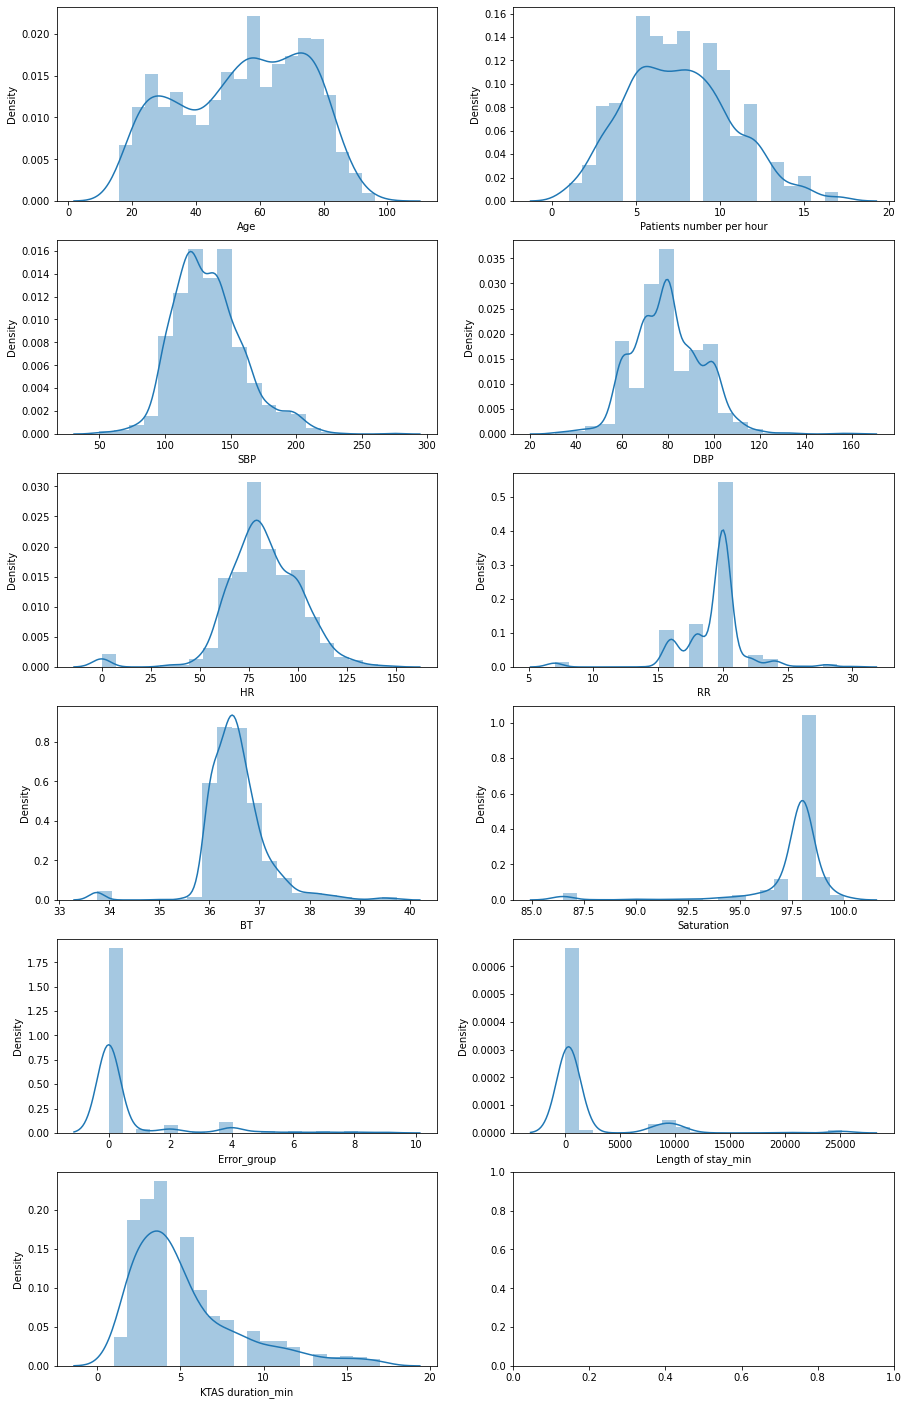

In [19]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(6,2, figsize=(15,25))
sns.distplot(df['Age'], bins = 20, ax=ax[0,0]) 
sns.distplot(df['Patients number per hour'], bins = 20, ax=ax[0,1]) 
sns.distplot(df['SBP'], bins = 20, ax=ax[1,0]) 
sns.distplot(df['DBP'], bins = 20, ax=ax[1,1]) 
sns.distplot(df['HR'], bins = 20, ax=ax[2,0])
sns.distplot(df['RR'], bins = 20, ax=ax[2,1])
sns.distplot(df['BT'], bins = 20, ax=ax[3,0]) 
sns.distplot(df['Saturation'], bins = 20, ax=ax[3,1]) 
sns.distplot(df['Error_group'], bins = 20, ax=ax[4,0])
sns.distplot(df['Length of stay_min'], bins = 20, ax=ax[4,1]) 
sns.distplot(df['KTAS duration_min'], bins = 20, ax=ax[5,0])

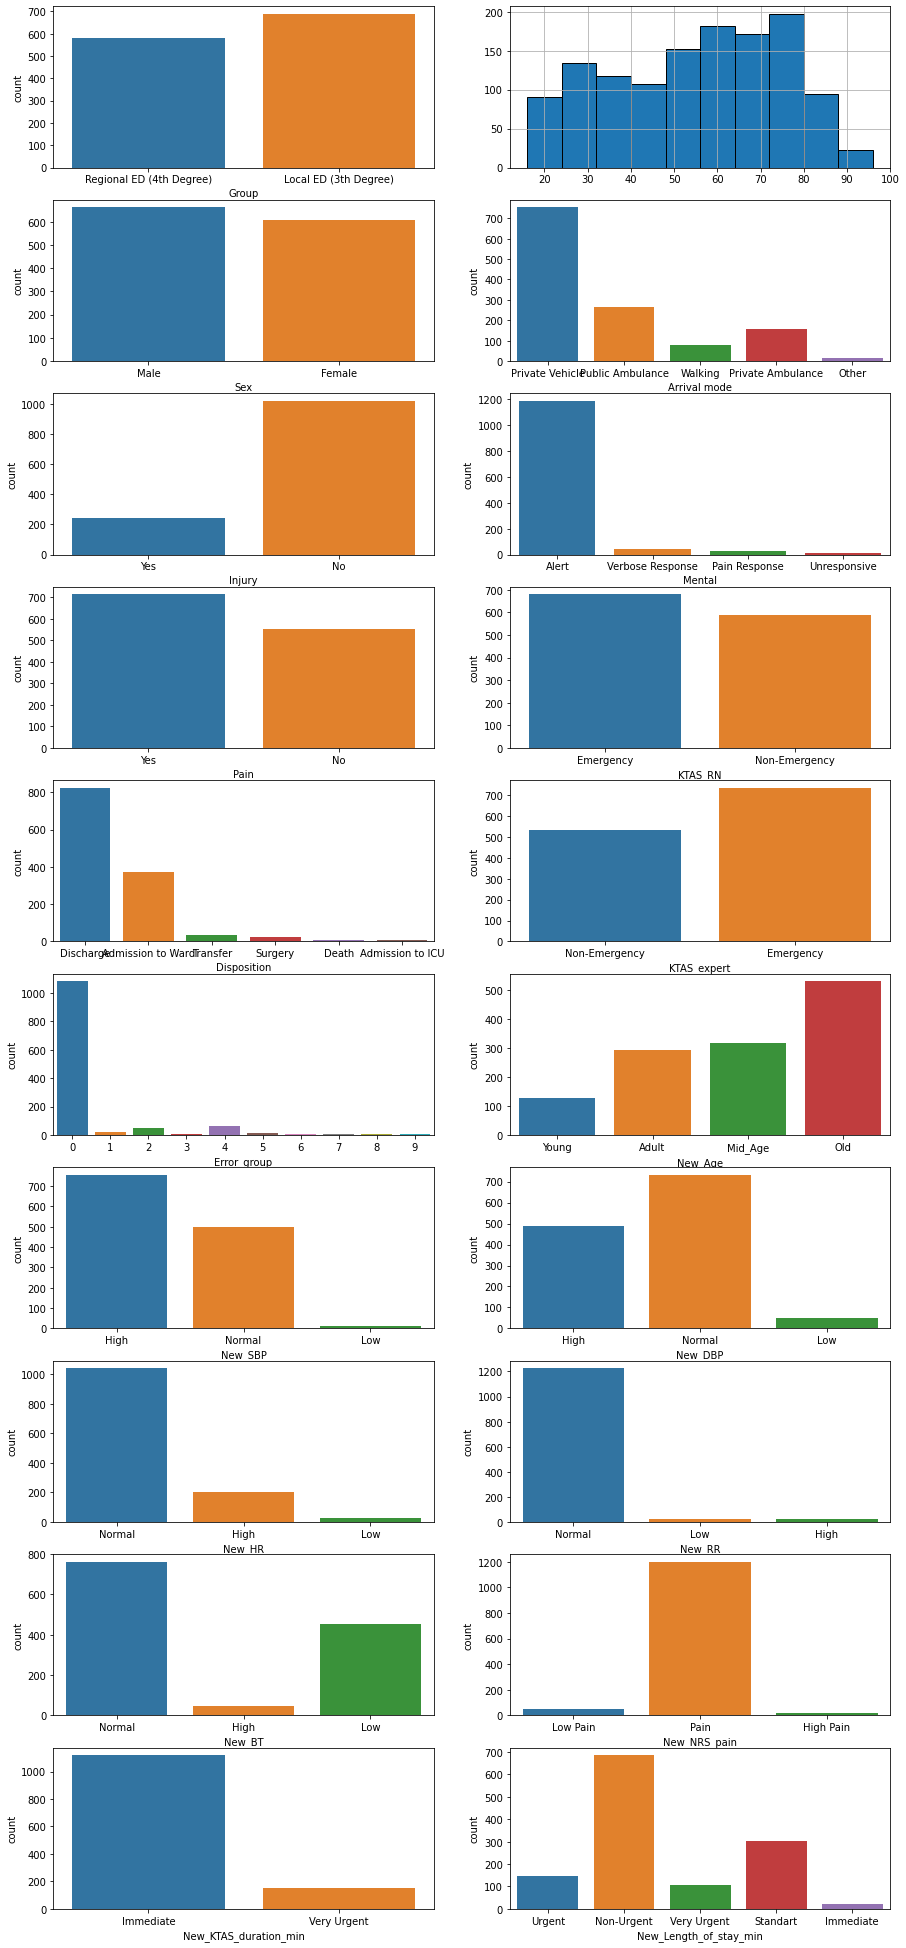

In [20]:
fig, ax = plt.subplots(10,2, figsize=(15,35))
sns.countplot('Group',data=df, ax=ax[0,0]);
df["Age"].hist(edgecolor = "black", ax=ax[0,1]);
sns.countplot('Sex',data=df, ax=ax[1,0]);
sns.countplot('Arrival mode',data=df, ax=ax[1,1]);
sns.countplot('Injury',data=df, ax=ax[2,0]);
sns.countplot('Mental',data=df, ax=ax[2,1]);
sns.countplot('Pain',data=df, ax=ax[3,0]);
sns.countplot('KTAS_RN',data=df, ax=ax[3,1]);
sns.countplot('Disposition',data=df, ax=ax[4,0]);
sns.countplot('KTAS_expert',data=df, ax=ax[4,1]);
sns.countplot('Error_group',data=df, ax=ax[5,0]);
sns.countplot('New_Age',data=df, ax=ax[5,1]);
sns.countplot('New_SBP',data=df, ax=ax[6,0]);
sns.countplot('New_DBP',data=df, ax=ax[6,1]);
sns.countplot('New_HR',data=df, ax=ax[7,0]);
sns.countplot('New_RR',data=df, ax=ax[7,1]);
sns.countplot('New_BT',data=df, ax=ax[8,0]);
sns.countplot('New_NRS_pain',data=df, ax=ax[8,1]);
sns.countplot('New_KTAS_duration_min',data=df, ax=ax[9,0]);
sns.countplot('New_Length_of_stay_min',data=df, ax=ax[9,1]);

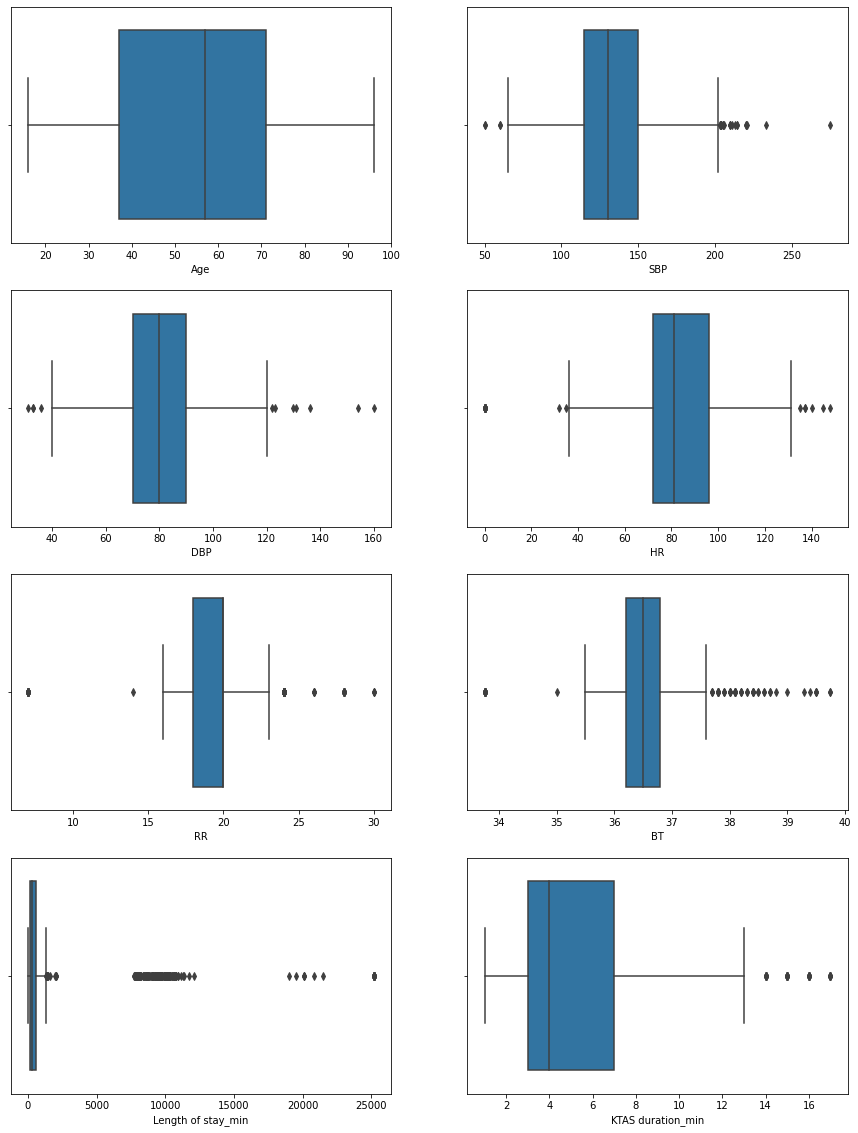

In [21]:
fig, ax = plt.subplots(4,2, figsize=(15,20))
sns.boxplot(x=df["Age"], ax=ax[0,0]);
sns.boxplot(x=df["SBP"], ax=ax[0,1]);
sns.boxplot(x=df["DBP"], ax=ax[1,0]);
sns.boxplot(x=df["HR"], ax=ax[1,1]);
sns.boxplot(x=df["RR"], ax=ax[2,0]);
sns.boxplot(x=df["BT"], ax=ax[2,1]);
sns.boxplot(x=df["Length of stay_min"], ax=ax[3,0]);
sns.boxplot(x=df["KTAS duration_min"], ax=ax[3,1]);

# 5. Data Segmentetion with Machine Learning Models
### 5.1. One Hot Encoding and Robust Scaler

In [22]:
def one_hot_encoder(dataframe, categorical_columns, nan_as_category=False):
    original_columns = list(dataframe.columns)
    dataframe = pd.get_dummies(dataframe, columns=categorical_columns,
                               dummy_na=nan_as_category, drop_first=True)
    new_columns = [col for col in dataframe.columns if col not in original_columns]
    return dataframe, new_columns

def robust_scaler(variable):
    var_median = variable.median()
    quartile1 = variable.quantile(0.05)
    quartile3 = variable.quantile(0.95)
    interquantile_range = quartile3 - quartile1
    if int(interquantile_range) == 0:
        quartile1 = variable.quantile(0.05)
        quartile3 = variable.quantile(0.95)
        interquantile_range = quartile3 - quartile1
        z = (variable - var_median) / interquantile_range
        return round(z, 3)
    else:
        z = (variable - var_median) / interquantile_range
    return round(z, 3)

In [56]:
new_df = df[["Group", "Sex", "Patients number per hour", "Injury", "Mental", "Pain", "Saturation", "KTAS_RN",
"Disposition", "KTAS_expert", "Length of stay_min", "mistriage", "New_Age", "New_SBP", "New_DBP", "New_HR",
"New_RR", "New_BT", "New_NRS_pain", "New_KTAS_duration_min", "New_Length_of_stay_min"]]
new_df.head()

,Group,Sex,Patients number per hour,Injury,Mental,Pain,Saturation,KTAS_RN,Disposition,KTAS_expert,Length of stay_min,mistriage,New_Age,New_SBP,New_DBP,New_HR,New_RR,New_BT,New_NRS_pain,New_KTAS_duration_min,New_Length_of_stay_min
0,Regional ED (4th Degree),Male,3,Yes,Alert,Yes,100.000,Emergency,Discharge,Non-Emergency,86.000,Over Triage,Old,High,High,Normal,Normal,Normal,Low Pain,Immediate,Urgent
1,Local ED (3th Degree),Female,12,Yes,Alert,Yes,98.000,Non-Emergency,Discharge,Non-Emergency,64.000,Over Triage,Mid_Age,High,Normal,Normal,Normal,Normal,Low Pain,Immediate,Urgent
2,Regional ED (4th Degree),Female,8,Yes,Alert,Yes,98.000,Non-Emergency,Admission to Ward,Non-Emergency,862.000,Over Triage,Old,High,Normal,High,Normal,Normal,Low Pain,Immediate,Non-Urgent
3,Local ED (3th Degree),Male,8,No,Alert,Yes,98.000,Non-Emergency,Discharge,Non-Emergency,108.000,Over Triage,Old,High,High,Normal,Normal,Normal,Pain,Immediate,Urgent
4,Local ED (3th Degree),Male,4,No,Alert,Yes,98.000,Non-Emergency,Discharge,Non-Emergency,109.000,Over Triage,Mid_Age,Normal,Normal,Normal,Normal,Normal,Pain,Immediate,Urgent


In [57]:
like_num = [col for col in new_df.columns if new_df[col].dtypes != 'O' and len(new_df[col].value_counts()) > 10]
cols_need_scale = [col for col in new_df.columns if col not in like_num
                   and col not in 'mistriage']

In [58]:
for col in like_num:
    new_df[col] = robust_scaler(new_df[col])

new_df, one_hot_encodeds = one_hot_encoder(new_df, cols_need_scale)

In [59]:
X = new_df.drop('mistriage', axis=1)
y = np.ravel(new_df[['mistriage']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 357)

In [60]:
X_train.head()

,Patients number per hour,Saturation,Length of stay_min,Group_Regional ED (4th Degree),Sex_Male,Injury_Yes,Mental_Pain Response,Mental_Unresponsive,Mental_Verbose Response,Pain_Yes,KTAS_RN_Non-Emergency,Disposition_Admission to Ward,Disposition_Death,Disposition_Discharge,Disposition_Surgery,Disposition_Transfer,KTAS_expert_Non-Emergency,New_Age_Adult,New_Age_Mid_Age,New_Age_Old,New_SBP_Low,New_SBP_Normal,New_DBP_Low,New_DBP_Normal,New_HR_Low,New_HR_Normal,New_RR_Low,New_RR_Normal,New_BT_Low,New_BT_Normal,New_NRS_pain_Low Pain,New_NRS_pain_Pain,New_KTAS_duration_min_Very Urgent,New_Length_of_stay_min_Non-Urgent,New_Length_of_stay_min_Standart,New_Length_of_stay_min_Urgent,New_Length_of_stay_min_Very Urgent
428,-0.500,-0.600,0.966,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0
772,-0.200,0.000,0.006,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0
873,0.300,0.000,-0.020,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0
572,0.200,0.000,-0.013,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0
385,0.200,-0.400,0.968,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0


In [61]:
# Let's set the parameters to find the best parameter to use in our models. These parameters will be chosen as the best to visit with GridSearchCV.
rf_params = {"max_depth": [3, 5, 8],
             "max_features": [8, 15, 25],
             "n_estimators": [200, 500, 1000],
             "min_samples_split": [2, 5, 10]}

lgbm_params = {"learning_rate": [0.01, 0.1],
               "n_estimators": [200, 500, 1000],
               "max_depth": [3, 5, 8],
               "colsample_bytree": [1, 0.8, 0.5]}

#xgb_params = {"learning_rate": [0.1, 0.01],
#              "max_depth": [3, 5, 8],
#              "n_estimators": [200, 500, 1000],
#              "colsample_bytree": [0.7, 1]}

rf = RandomForestClassifier(random_state=357)
lgbm = LGBMClassifier(random_state=357)
#xgb = XGBClassifier(random_state=357)

# Let's try the parameters one by one with the help of GridSearchCV and find the best parameter.
gs_cv_rf = GridSearchCV(rf, rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
gs_cv_lgbm = GridSearchCV(lgbm, lgbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
#gs_cv_xgb = GridSearchCV(xgb, xgb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  8.3min finished


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  3.0min finished


In [29]:
#lgr_tuned = LogisticRegression(random_state=357).fit(X_train, y_train)
knn_tuned = KNeighborsClassifier().fit(X_train, y_train)
svm_tuned = SVC(random_state=357,gamma='auto').fit(X_train, y_train)
gnb_tuned = GaussianNB().fit(X_train, y_train)
dtc_tuned = DecisionTreeClassifier(random_state=357).fit(X_train, y_train)

# Let's tune the models with the best parameters found.
rf_tuned = RandomForestClassifier(**gs_cv_rf.best_params_, random_state=357).fit(X_train, y_train)
lgbm_tuned = LGBMClassifier(**gs_cv_lgbm.best_params_, random_state=357).fit(X_train, y_train)
#xgb_tuned = XGBClassifier(**gs_cv_xgb.best_params_, random_state=357).fit(X_train, y_train)

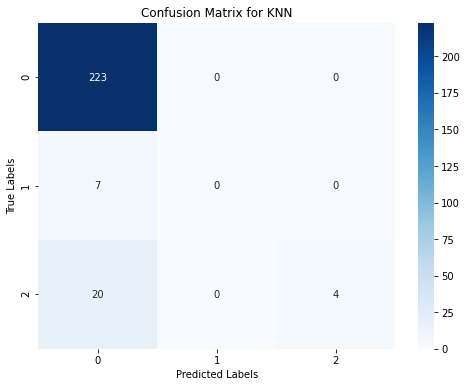

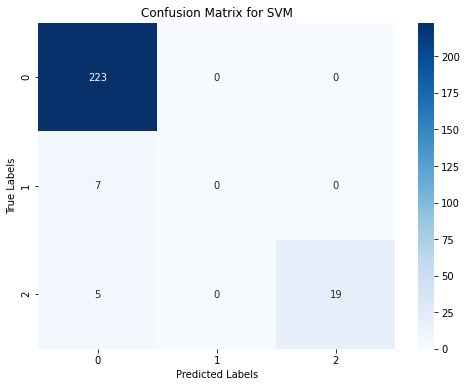

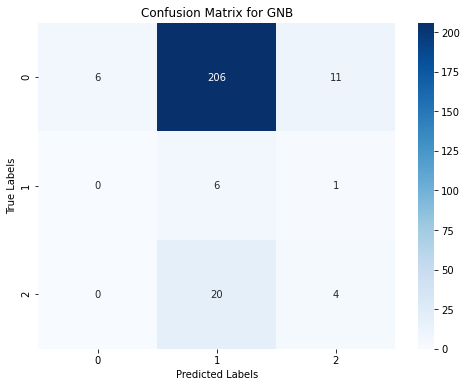

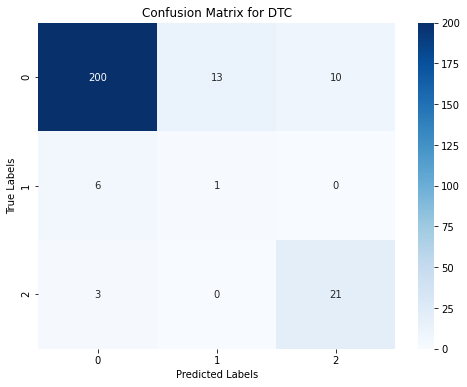

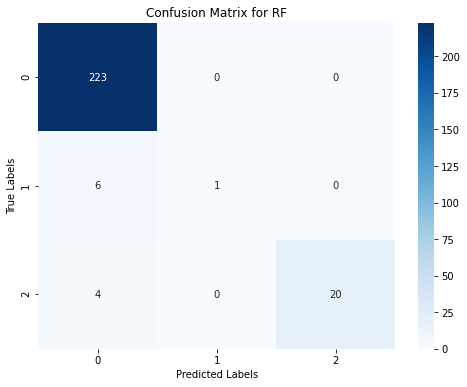

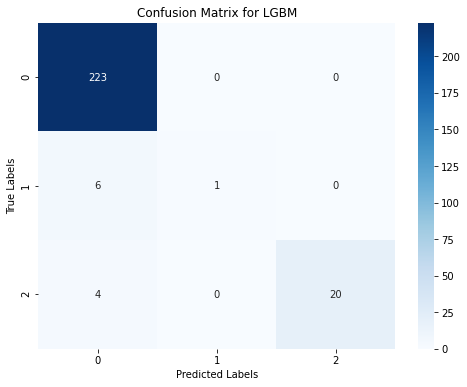

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ... (Previous code)

# Result
models = [("KNN", knn_tuned), ("SVM", svm_tuned), ("GNB", gnb_tuned),
          ("DTC", dtc_tuned), ("RF", rf_tuned), ("LGBM", lgbm_tuned)]

for name, model in models:
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

In [31]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# ... (Previous code)

# Result
models = [("KNN", knn_tuned), ("SVM", svm_tuned), ("GNB", gnb_tuned),
          ("DTC", dtc_tuned), ("RF", rf_tuned), ("LGBM", lgbm_tuned)]

for name, model in models:
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')  # Use 'micro' for multiclass
    msg = "%s: Accuracy (%f), F1 Score (%f)" % (name, acc, f1)
    print(msg)

KNN: Accuracy (0.893701), F1 Score (0.893701)
SVM: Accuracy (0.952756), F1 Score (0.952756)
GNB: Accuracy (0.062992), F1 Score (0.062992)
DTC: Accuracy (0.874016), F1 Score (0.874016)
RF: Accuracy (0.960630), F1 Score (0.960630)
LGBM: Accuracy (0.960630), F1 Score (0.960630)


In [32]:
for name, model in models:
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='micro')  # Adjust 'micro' as needed
    msg = "%s: Precision (%f)" % (name, precision)
    print(msg)

KNN: Precision (0.893701)
SVM: Precision (0.952756)
GNB: Precision (0.062992)
DTC: Precision (0.874016)
RF: Precision (0.960630)
LGBM: Precision (0.960630)


In [33]:
for name, model in models:
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred, average='micro')  # Adjust 'micro' as needed
    msg = "%s: Recall (%f)" % (name, recall)
    print(msg)

KNN: Recall (0.893701)
SVM: Recall (0.952756)
GNB: Recall (0.062992)
DTC: Recall (0.874016)
RF: Recall (0.960630)
LGBM: Recall (0.960630)


In [34]:
#classifiers=[#("LGR", lgr_tuned),
 #         ("KNN", knn_tuned),
  #        ("SVM", svm_tuned),
   #       ("GNB", gnb_tuned),
    #      ("DTC", dtc_tuned),
     #     ("RF", rf_tuned),
      #    ("LGBM", lgbm_tuned),
          #("XGB", xgb_tuned)
       #  ]
#cla_pred=[]
#for name,model in classifiers:
 #   model=model
  #  model.fit(X_train,y_train)
   # predictions = model.predict(X_test)
    #cla_pred.append(accuracy_score(y_test,predictions))
    #print(name,accuracy_score(y_test,predictions))
    

In [35]:
#y_ax=['KNN' ,
 #     'SVM',
  #    'GNB',
   #   'DTC',
    #  'RF',
     # 'LGBM']
#x_ax=cla_pred

In [36]:
#sns.barplot(x=x_ax,y=y_ax,linewidth=1.5,edgecolor="0.8")
#plt.xlabel('Accuracy')

In [46]:
'''import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

subset_df=new_df.sample(frac=0.8,random_state=42)
# Assuming new_df is your DataFrame with features and target variable 'mistriage'
X = new_df.drop('mistriage', axis=1)
y = np.ravel(new_df[['mistriage']])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=357)

# List of hyperparameters to tune
knn_params = {'n_neighbors': [3, 5, 7]}
svm_params = {'C': [0.1, 1, 10], 'gamma': ['auto', 'scale']}
dtc_params = {'max_depth': [None, 5, 10]}
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}
lgbm_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}

# Function to perform sensitivity analysis with accuracy, precision, and recall
def sensitivity_analysis(model, params, X, y):
    for param_name, param_values in params.items():
        for value in param_values:
            params_to_test = {param_name: value}
            tuned_model = model.set_params(**params_to_test).fit(X, y)
            
            # Use cross-validation to obtain predictions
            y_pred = cross_val_predict(tuned_model, X, y, cv=5)
            
            # Calculate accuracy, precision, and recall
            acc = accuracy_score(y, y_pred)
            
            # Handle multiclass precision and recall
            prec = precision_score(y, y_pred, average='weighted', zero_division=0)
            rec = recall_score(y, y_pred, average='weighted', zero_division=0)
            
            print(f"{model.__class__.__name__} with {param_name}={value}: "
                  f"Accuracy: {acc}, Precision: {prec}, Recall: {rec}")

# Perform sensitivity analysis for each model
sensitivity_analysis(KNeighborsClassifier(), knn_params, X_train, y_train)
sensitivity_analysis(SVC(random_state=357, gamma='auto'), svm_params, X_train, y_train)
sensitivity_analysis(GaussianNB(), {}, X_train, y_train)
sensitivity_analysis(DecisionTreeClassifier(random_state=357), dtc_params, X_train, y_train)
sensitivity_analysis(RandomForestClassifier(random_state=357), rf_params, X_train, y_train)
sensitivity_analysis(LGBMClassifier(random_state=357), lgbm_params, X_train, y_train)
'''



KNeighborsClassifier with n_neighbors=3: Accuracy: 0.8371174728529122, Precision: 0.7739725146133966, Recall: 0.8371174728529122
KNeighborsClassifier with n_neighbors=5: Accuracy: 0.8499506416584403, Precision: 0.7928996380388286, Recall: 0.8499506416584403
KNeighborsClassifier with n_neighbors=7: Accuracy: 0.8548864758144127, Precision: 0.8123207822121938, Recall: 0.8548864758144127
SVC with C=0.1: Accuracy: 0.8469891411648569, Precision: 0.7173906052511818, Recall: 0.8469891411648569
SVC with C=1: Accuracy: 0.8499506416584403, Precision: 0.8251483193729047, Recall: 0.8499506416584403
SVC with C=10: Accuracy: 0.9279368213228035, Precision: 0.9335873176100595, Recall: 0.9279368213228035
SVC with gamma=auto: Accuracy: 0.9279368213228035, Precision: 0.9335873176100595, Recall: 0.9279368213228035
SVC with gamma=scale: Accuracy: 0.9151036525172754, Precision: 0.9109098385179166, Recall: 0.9151036525172754
DecisionTreeClassifier with max_depth=None: Accuracy: 0.8795656465942744, Precision: 

In [55]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

# Assuming new_df is your DataFrame with features and target variable 'mistriage'
# Select a subset of features for sensitivity analysis
df_subset = new_df.sample(frac=0.8, random_state=42)
#[['Feature1', 'Feature2', 'Feature3', 'mistriage']]

# Define features and target variable for the subset
X_subset = df_subset.drop('mistriage', axis=1)
y_subset = np.ravel(df_subset[['mistriage']])

# Split the subset data into training and testing sets
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(
    X_subset, y_subset, test_size=0.20, random_state=357
)

# List of hyperparameters to tune
knn_params = {'n_neighbors': [3, 5, 7]}
svm_params = {'C': [0.1, 1, 10], 'gamma': ['auto', 'scale']}
dtc_params = {'max_depth': [None, 5, 10]}
rf_params = {'n_estimators': [50, 100, 200]}
lgbm_params = {'n_estimators': [50, 100, 200]}

# Function to perform sensitivity analysis with accuracy, precision, and recall
def sensitivity_analysis(model, params, X, y):
    for param_name, param_values in params.items():
        for value in param_values:
            params_to_test = {param_name: value}
            tuned_model = model.set_params(**params_to_test).fit(X, y)
            
            # Use cross-validation to obtain predictions
            y_pred = cross_val_predict(tuned_model, X, y, cv=5)
            
            # Calculate accuracy, precision, and recall
            acc = accuracy_score(y, y_pred)
            
            # Handle multiclass precision and recall
            prec = precision_score(y, y_pred, average='weighted', zero_division=0)
            rec = recall_score(y, y_pred, average='weighted', zero_division=0)
            
            print(f"{model.__class__.__name__} with {param_name}={value}: "
                  f"Accuracy: {acc}, Precision: {prec}, Recall: {rec}")

# Perform sensitivity analysis for each model using the subset data
sensitivity_analysis(KNeighborsClassifier(), knn_params, X_train_subset, y_train_subset)
sensitivity_analysis(SVC(random_state=357, gamma='auto'), svm_params, X_train_subset, y_train_subset)
sensitivity_analysis(GaussianNB(), {}, X_train_subset, y_train_subset)
sensitivity_analysis(DecisionTreeClassifier(random_state=357), dtc_params, X_train_subset, y_train_subset)
sensitivity_analysis(RandomForestClassifier(random_state=357), rf_params, X_train_subset, y_train_subset)
sensitivity_analysis(LGBMClassifier(random_state=357), lgbm_params, X_train_subset, y_train_subset)




KNeighborsClassifier with n_neighbors=3: Accuracy: 0.8372379778051788, Precision: 0.777051237353827, Recall: 0.8372379778051788
KNeighborsClassifier with n_neighbors=5: Accuracy: 0.8471023427866831, Precision: 0.7938542410279706, Recall: 0.8471023427866831
KNeighborsClassifier with n_neighbors=7: Accuracy: 0.843403205918619, Precision: 0.7785153850266021, Recall: 0.843403205918619
SVC with C=0.1: Accuracy: 0.842170160295931, Precision: 0.7092505788928741, Recall: 0.842170160295931
SVC with C=1: Accuracy: 0.8976572133168927, Precision: 0.8668230241490215, Recall: 0.8976572133168927
SVC with C=10: Accuracy: 0.93711467324291, Precision: 0.9414840896797105, Recall: 0.93711467324291
SVC with gamma=auto: Accuracy: 0.93711467324291, Precision: 0.9414840896797105, Recall: 0.93711467324291
SVC with gamma=scale: Accuracy: 0.9247842170160296, Precision: 0.917490141228803, Recall: 0.9247842170160296
DecisionTreeClassifier with max_depth=None: Accuracy: 0.8939580764488286, Precision: 0.902450296086